# K Means Clustering

### Data Loading

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


### Data Plotting

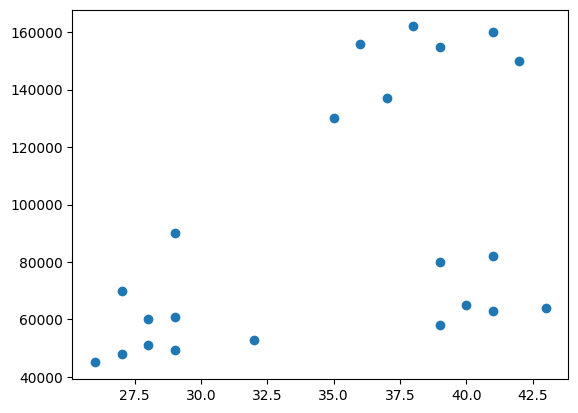

In [15]:
plt.scatter(df['Age'], df['Income($)'])
plt.show()

### K Means Clustering

In [16]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)
km.fit(df[['Age', 'Income($)']])
km.labels_

array([0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [17]:
df['Cluster'] = km.labels_
df.head()

,Name,Age,Income($),Cluster
0,Rob,27,70000,0
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [18]:
print(df.columns)

Index(['Name', 'Age', 'Income($)', 'Cluster'], dtype='object')


<Axes: xlabel='Age', ylabel='Income($)'>

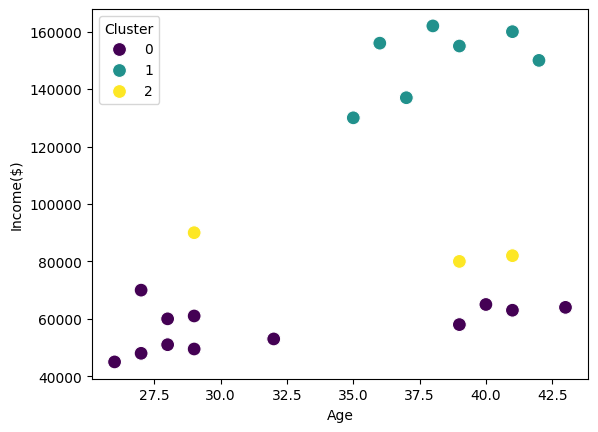

In [19]:
sns.scatterplot(df, x='Age', y='Income($)',  palette='viridis', s=100, hue="Cluster")

### Min Max Scaling

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_scaled = pd.DataFrame(columns=['Age', 'Income($)'])
df_scaled[['Age', 'Income($)']] = scaler.fit_transform(df[['Age', 'Income($)']])
df_scaled.head()

,Age,Income($)
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436


In [26]:
km = KMeans(n_clusters=3)
km.fit(df_scaled[['Age', 'Income($)']])
df_scaled['Cluster'] = km.labels_
df_scaled.head()

,Age,Income($),Cluster
0,0.058824,0.213675,0
1,0.176471,0.384615,0
2,0.176471,0.136752,0
3,0.117647,0.128205,0
4,0.941176,0.897436,1


In [34]:
km.inertia_

0.4750783498553096

In [31]:
centroids = km.cluster_centers_
print(centroids)

[[0.1372549  0.11633428]
 [0.72268908 0.8974359 ]
 [0.85294118 0.2022792 ]]


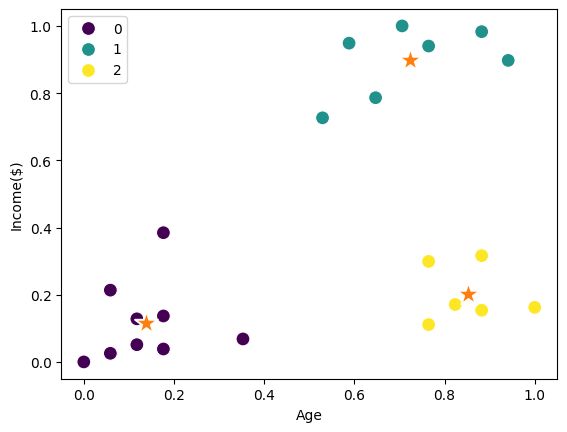

In [33]:
sns.scatterplot(df_scaled, x='Age', y='Income($)',  palette='viridis', s=100, hue="Cluster")
sns.scatterplot(x=centroids[:, 0], y=centroids[:,1], s=300, marker='*')
plt.show()

### Elbow Method to determine optimal number of clusters

In [38]:
sse = []

k_rng = range(1,10)

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df_scaled[["Age", "Income($)"]])
    sse.append(km.inertia_)
sse

[5.434011511988179,
 2.3456144914725936,
 0.4750783498553096,
 0.3881529166478744,
 0.3366404252934583,
 0.300597506280232,
 0.18588411717533662,
 0.13781880133764024,
 0.10188787724979426]

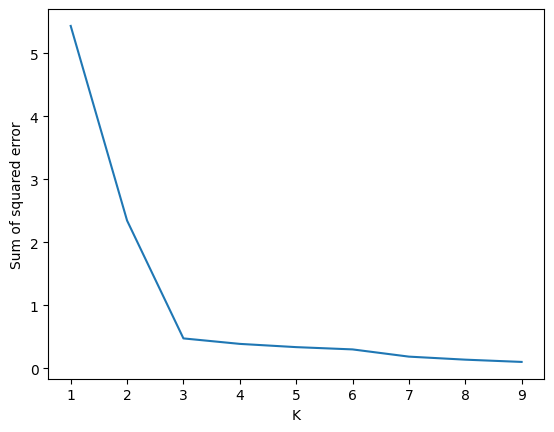

In [39]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)
plt.show()